### Make sure you have [saliency-localizer-models](https://github.com/nebw/saliency-localizer-models) and [deeplocalizer_data](https://github.com/BioroboticsLab/deeplocalizer_data) checked out on the same level as this repo

`$ ls` should gives you something like this:

```
deeplocalizer_data
saliency-localizer
saliency-localizer-models
```

If your local setup is different you have to change the paths accordingly. 

In [ ]:
%matplotlib inline

from os.path import expanduser, join

from localizer.localizer import Localizer
from localizer import visualization

from scipy.misc import imread

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

It is assumed that the `saliency-localizer-models` is checkout on the same level as the `saliency-localizer` repository.
Depending on your setup you might have to change this path.

In [2]:
loc = Localizer()
loc.load_weights('../saliency-localizer-models/season_2015')

2016-02-26 15:08:32,831:INFO - Restoring saliency network weights...


## Compile Localizer

In [3]:
loc.compile()

2016-02-26 15:08:32,909:INFO - Compiling saliency network convolution function...


In [4]:
image_path = join(expanduser("~"), 'deeplocalizer_data')
with open(join(image_path, 'test.txt'), 'r') as f:
    image_files = [join(image_path, line.split('\n')[0]) for line in f.readlines()]

In [5]:
image_file = image_files[0]
saliencies, candidates, rois = loc.detect_tags(image_file)

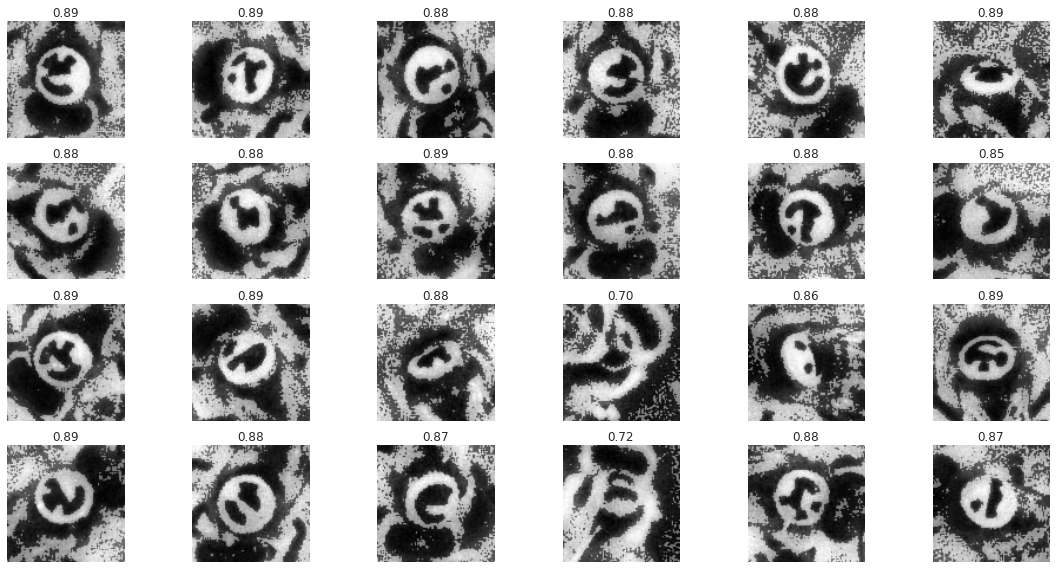

In [6]:
fig = visualization.plot_sample_images(rois, saliencies)

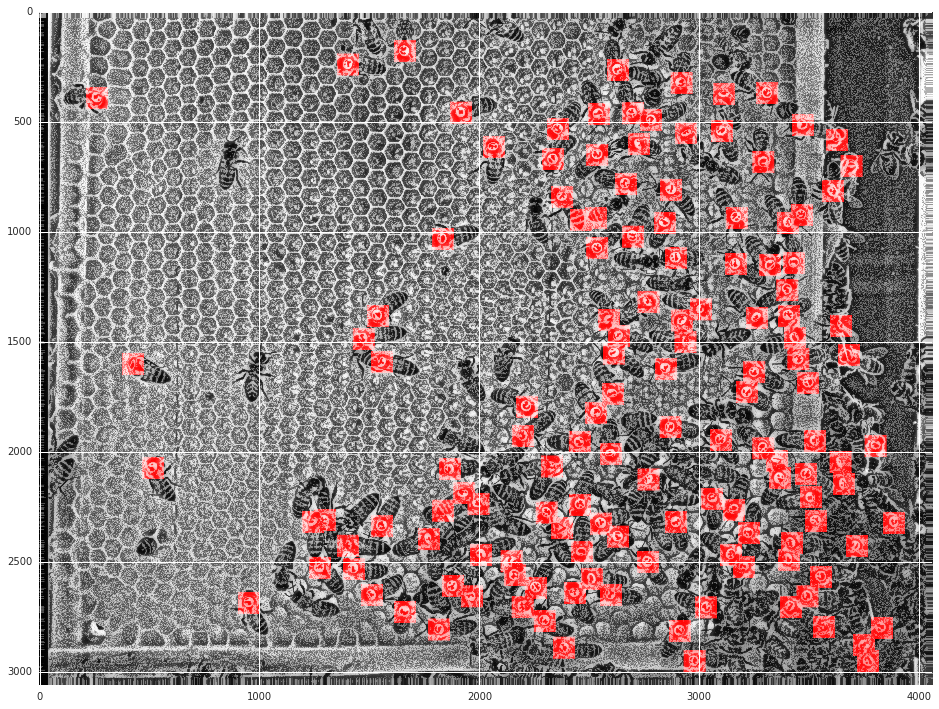

In [7]:
plt.figure(figsize=(16, 16))
_ = plt.imshow(visualization.get_roi_overlay(candidates, imread(image_file) / 255.))